# International Street Festival


In [1]:
import sys
sys.path.append('../src/')

## Read all sensor data

In [2]:
# Contains as key the sensor name and as value the complete data
from SmartCityHelper.Data import getAllSensors

sensorData = getAllSensors()

print(sensorData.keys())

dict_keys(['Brenzstr', 'FuZo_Eugen-Jaekle-Platz', 'FuZo_Olgastr', 'Arkaden', 'Knoepfle_Nord', 'Knoepfle_Ost'])


## Visualize Sensors

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

from SmartCityHelper.Filter import filterDateRange
from SmartCityHelper.Reducer import sumReducer, avgReducer, sumReducerWithReset
import datetime


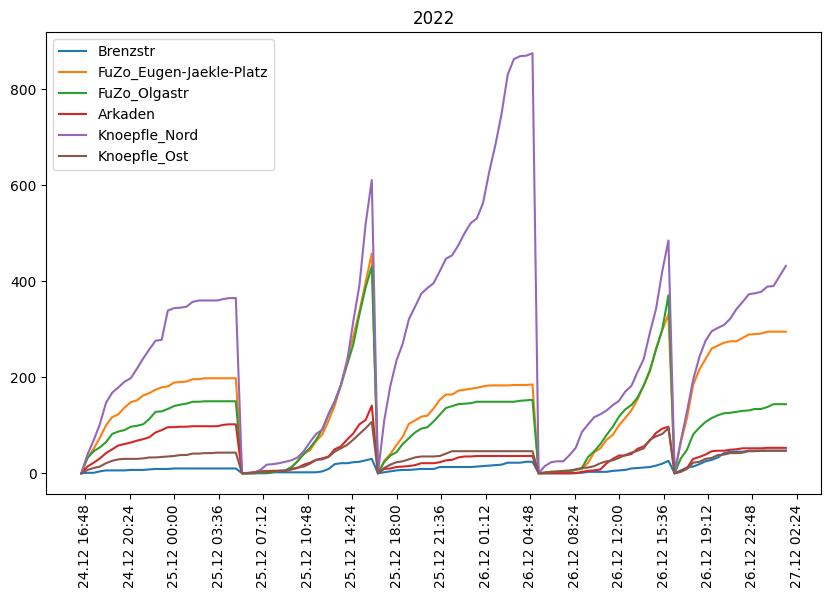

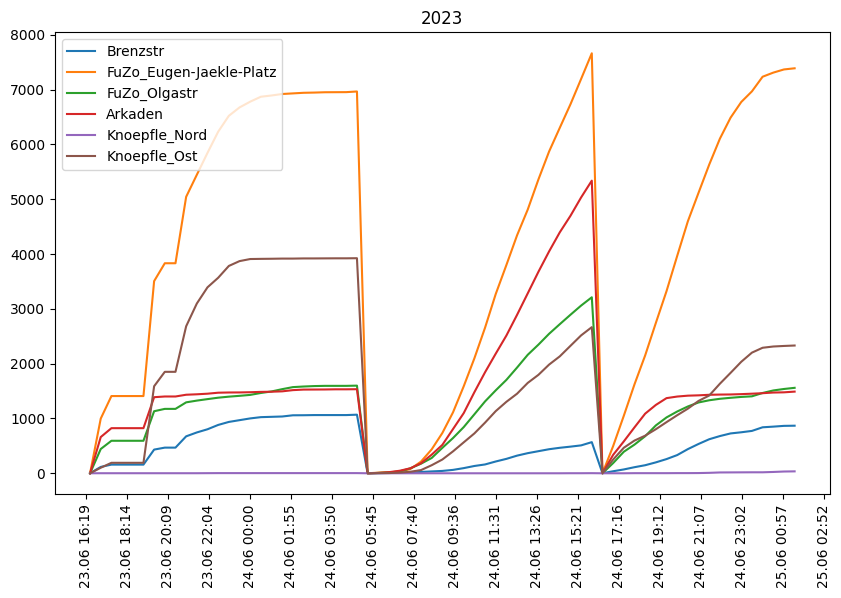

In [11]:
### 2022

plt.subplots(figsize=(10, 6))
for sensorName, data in sensorData.items():
    dataPoints = dict(sorted(data['singleDataPoints'].items())).values()
    dataPointsStreetFestival = [d for d in dataPoints if filterDateRange(d, "2022-12-24 16:00:00", "2022-12-27 02:00:00")]
    dataPointsStreetFestival = sumReducerWithReset(dataPointsStreetFestival, 'person.in', ["2022-12-25 05:00:00", "2022-12-25 16:00:00", "2022-12-26 05:00:00", "2022-12-26 16:00:00"])
    #dataPointsStreetFestival = avgReducer(dataPointsStreetFestival, 'person.in', 2)

    x = []
    y = []

    for dataPoint in dataPointsStreetFestival:
        y.append(dataPoint['person.in'])
        datetimeValue = datetime.datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')
        x.append(datetimeValue)

    plt.plot(x, y, label=sensorName)

#plt.ylim(0, 5000)
leg = plt.legend(loc='upper left')
plt.title("2022")

ax=plt.gca()
xfmt = md.DateFormatter('%d.%m %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
plt.savefig('warten-aufs-christkind-2022.png', bbox_inches="tight")

### 2023

plt.subplots(figsize=(10, 6))
for sensorName, data in sensorData.items():
    dataPoints = dict(sorted(data['singleDataPoints'].items())).values()
    dataPointsStreetFestival = [d for d in dataPoints if filterDateRange(d, "2023-06-23 16:00:00", "2023-06-25 02:00:00")]
    dataPointsStreetFestival = sumReducerWithReset(dataPointsStreetFestival, 'person.in', ["2023-06-24 05:00:00", "2023-06-24 16:00:00"])
    #dataPointsStreetFestival = avgReducer(dataPointsStreetFestival, 'person.in', 2)

    x = []
    y = []

    for dataPoint in dataPointsStreetFestival:
        y.append(dataPoint['person.in'])
        datetimeValue = datetime.datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')
        x.append(datetimeValue)

    plt.plot(x, y, label=sensorName)
    
#plt.ylim(0, 5000)
leg = plt.legend(loc='upper left')
plt.title("2023")

ax=plt.gca()
xfmt = md.DateFormatter('%d.%m %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
plt.savefig('warten-aufs-christkind-2023.png', bbox_inches="tight")
plt.show()

# Get absoulte numbers:

In [5]:
for sensorName, data in sensorData.items():
    dataPoints = dict(sorted(data['singleDataPoints'].items())).values()
    dataPoints22 = [d for d in dataPoints if filterDateRange(d, "2022-12-23 20:30:00", "2022-12-24 05:00:00")]
    dataPoints22 = sumReducer(dataPoints22, 'person.in')

    print("2022 {0}: {1}".format(sensorName, dataPoints22[-1]['person.in']))

    dataPoints23 = [d for d in dataPoints if filterDateRange(d, "2023-12-23 20:30:00", "2023-12-24 05:00:00")]
    dataPoints23 = sumReducer(dataPoints23, 'person.in')
    
    print("2023 {0}: {1}".format(sensorName, dataPoints23[-1]['person.in']))


2022 Brenzstr: 1041
2023 Brenzstr: 604
2022 FuZo_Eugen-Jaekle-Platz: 1885
2023 FuZo_Eugen-Jaekle-Platz: 2172
2022 FuZo_Olgastr: 2494
2023 FuZo_Olgastr: 796
2022 Arkaden: 276
2023 Arkaden: 58
2022 Knoepfle_Nord: 1377
2023 Knoepfle_Nord: 304
2022 Knoepfle_Ost: 147
2023 Knoepfle_Ost: 15


In [6]:
import folium
import random

# Create a folium map centered at a specific location
m = folium.Map(location=[48.67638280435713, 10.151585739252655], zoom_start=15, zoom_control=False)

# Add markers for each sensor
for sensorName, data in sensorData.items():
    
    #MAX_DELTA =  0.00009
    MAX_DELTA =  0.0002

    latitude = data['latitude'] + (random.uniform(0, 1) * MAX_DELTA) - (MAX_DELTA / 2)
    longitude = data['longitude'] + (random.uniform(0, 1) * MAX_DELTA) - (MAX_DELTA / 2)


    label = folium.Marker(
        location=[latitude, longitude],
        icon=folium.Icon(),
        tooltip=sensorName
    )
    label.add_to(m)

# Display the map
#m.save(outfile= "map_of_sensors.html")
m

